In [171]:
import pandas as pd
import numpy as np
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
from datasets import DatasetDict, load_from_disk
import json
import warnings
import random
warnings.filterwarnings( 'ignore' )
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
from matplotlib import font_manager, rc
font_path = "/opt/ml/level2_mrc_nlp-level2-nlp-07/code/assets/NanumBarunGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()

In [4]:
train_dataset = load_from_disk('/opt/ml/input/data/train_dataset')
test_dataset = load_from_disk('/opt/ml/input/data/test_dataset')

In [5]:
train_df = pd.DataFrame(train_dataset['train'])
val_df = pd.DataFrame(train_dataset['validation'])
test_df = pd.DataFrame(test_dataset['validation'])

In [6]:
with open('/opt/ml/input/data/wikipedia_documents.json', "r", encoding="utf-8") as f:
    wiki = json.load(f)

In [33]:
wiki_df=pd.DataFrame.from_dict(wiki).transpose()

## dataframe

In [8]:
test_df

,question,id
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272
...,...,...
595,타입 2 가이아 메모리을 만든 집단은?,mrc-0-002989
596,장면이 정치보복에 반대하는 입장에서 처벌을 원치 않은 대상은?,mrc-0-001804
597,"콜드게임 중 어떠한 계기로 인해 잠시 중단된 뒤, 익일에 게임이 진행되는 것은?",mrc-0-003411
598,제2캐나다기갑여단이 상륙한 곳은?,mrc-0-003436


In [9]:
train_df

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548
...,...,...,...,...,...,...,...
3947,이오 (위성),이오의 산\n이오의 산 목록\n 이오에는 100~150개의 산이 있다. 이들 산의 ...,대부분의 이오의 산이 형성되는데 영향을 끼친 것은?,mrc-0-005285,"{'answer_start': [317], 'text': ['지질 구조']}",8275,3445
3948,내니 다이어리,애니의 고군분투 뉴욕 입성기!!\n\n인류학자가 꿈인 21살 소녀 '애니(스칼렛 요...,애니는 어디서 태어났는가?,mrc-1-000699,"{'answer_start': [616], 'text': ['뉴저지']}",37764,450
3949,빈 필하모니 관현악단,1842년에 작곡가이자 지휘자인 오토 니콜라이가 빈 궁정 오페라극장 소속 관현악단을...,1854년에 니콜라이의 뒤를 이어 상임 지휘자로서 활동한 인물은?,mrc-0-003429,"{'answer_start': [255], 'text': ['칼 에케르트']}",12730,2252
3950,드래곤,원어는 고대 그리스어까지 거슬러 올라간다. 영어 문헌에 이 말이 나타나기 시작한 것...,드래곤의 암수 구분이 있는 신화는?,mrc-0-003956,"{'answer_start': [476], 'text': ['슬라브 신화']}",10924,2595


In [10]:
val_df

,title,context,question,id,answers,document_id,__index_level_0__
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184
...,...,...,...,...,...,...,...
235,전단 (제나라),"연나라 군대의 사령관이 악의에서 기겁으로 교체되자, 전단은 스스로 신령의 계시를 받...",전단이 연나라와의 전쟁에서 승리했을 당시 제나라의 왕은 누구인가?,mrc-0-000484,"{'answer_start': [1084], 'text': ['제 양왕']}",53265,329
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,공놀이 경기장 중 일부는 어디에 위치하고 있나?,mrc-0-002095,"{'answer_start': [343], 'text': [''일곱 개의 신전 광장...",12190,1378
237,윤치호,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,창씨개명령의 시행일을 미루는 것을 수락한 인물은?,mrc-0-003083,"{'answer_start': [247], 'text': ['미나미 지로']}",5326,2031
238,신잉카국,빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...,망코 잉카가 쿠스코를 되찾기 위해 마련한 군사는 총 몇 명인가?,mrc-0-002978,"{'answer_start': [563], 'text': ['200,000명']}",48575,1963


In [11]:
wiki_pd

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4
...,...,...,...,...,...,...,...,...
60608,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60608
60609,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60609
60610,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60610
60611,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,위키피디아,None,None,단결권 및 단체교섭권 협약,None,None,60611


## Make Columns

In [118]:
train_df['context_len'] = train_df['context'].apply(lambda x: len(x))
val_df['context_len'] = val_df['context'].apply(lambda x: len(x))
wiki_df['text_len'] = wiki_df['text'].apply(lambda x: len(x))

In [119]:
train_df['question_len'] = train_df['question'].apply(lambda x: len(x))
val_df['question_len'] = val_df['question'].apply(lambda x: len(x))
test_df['question_len'] = test_df['question'].apply(lambda x: len(x))

In [130]:
train_df['answer_len'] = train_df['answers'].apply(lambda x: len(x['text'][0]))
val_df['answer_len'] = val_df['answers'].apply(lambda x: len(x['text'][0]))

## duplicate data

In [15]:
train_df['context'].describe()

count                                                  3952
unique                                                 3340
top       그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백...
freq                                                      4
Name: context, dtype: object

In [16]:
train_df[train_df['context'].duplicated()].sort_values(by='context_len')

,title,context,question,id,answers,document_id,__index_level_0__,context_len,question_len
1364,에우데르 카마라,하지만 동 에우데르 카마라 대주교가 사회복지사업으로는 가난이 해결되지 않는다는 것을...,교황 요한 바오로 2세는 카마라 대주교와 함께 누가 인간다운 삶을 살 수 있도록 도...,mrc-0-001186,"{'answer_start': [368], 'text': ['민중들']}",21025,776,512,50
1032,불암산 호랑이 유격대,마지막 유격전은 적의 수송대를 공격하는 작전이었다. 생도들은 정보원으로부터 북한군의...,불암산 호랑이 유격대의 마지막 유격전은 어떤 군대의 수송대를 공격하는 작전이었나요?,mrc-0-004447,"{'answer_start': [42], 'text': ['북한군']}",56191,2900,512,46
1545,호라티우스,호라티우스의 출신 가문은 정확히 알려져 있지 않다. 아마 그의 아버지는 노예에서 해...,호라티우스와 가이우스 마에케나스를 만나게 해 준 사람은?,mrc-1-000084,"{'answer_start': [322], 'text': ['베르길리우스']}",4917,54,513,31
3265,호라티우스,호라티우스의 출신 가문은 정확히 알려져 있지 않다. 아마 그의 아버지는 노예에서 해...,호라티우스가 깊은 우정관계라고 생각한 인물은?,mrc-1-001773,"{'answer_start': [356], 'text': ['가이우스 마에케나스(G...",4917,1158,513,25
2272,리싸 해전 (1866년),리싸 해전 은 1866년 7월 20일 아드리아해 달마티아 제도의 비스섬 근해에서 오...,알비니가 전장에 나타나지 않은 것은 무엇 때문인가?,mrc-0-000353,"{'answer_start': [291], 'text': ['권력 갈등']}",36511,239,515,28
...,...,...,...,...,...,...,...,...,...
3491,시조 위미르,하지만 어릴 때부터 도덕 관념을 배우지 못하고 침략국의 노예로 끌려져와 글씨나 문자...,족장에서 황제로 진급한 인물이 위미르를 깔보며 불렀던 명칭은?,mrc-0-001441,"{'answer_start': [806], 'text': ['""나의 노예""']}",55153,947,1997,34
2369,교황 에우제니오 2세,에우제니오 2세의 선출과 즉위는 프랑크족에 대한 승리로서 이후로도 큰 영향을 끼쳤다...,교황 선출에 황제의 동의가 필요하게 된 연도는?,mrc-1-001623,"{'answer_start': [195], 'text': ['824년']}",6715,1063,2030,26
1318,윤치호,민족자결주의\n1916년 조선총독부는 여러 번 사람을 보내 그에게 당국 시책에 협조...,신익희는 어느 장소에서 윤치호에게 독립운동 참여를 권유했나요?,mrc-0-005242,"{'answer_start': [1613], 'text': ['종로청년회관']}",5306,3412,2041,34
1610,겨울 전쟁,파아보 탈벨라가 지휘를 맡기 이전의 그 지역 핀란드군은 적의 포화에 쫓겨 후퇴를 거...,핀란드군을 이끌어 기습 공격을 하고 숲 속으로 철수한 인물은?,mrc-0-000572,"{'answer_start': [0], 'text': ['파아보 탈벨라']}",4878,389,2052,34


## Title distribution 분석

### train

In [17]:
train_df['title'].unique()

array(['미국 상원', '인사조직관리', '강희제', ..., '미국 알래스카 육군', '내니 다이어리',
       '빈 필하모니 관현악단'], dtype=object)

In [18]:
train_title=train_df['title'].value_counts().sort_values(ascending=False)

In [72]:
len(train_df)

3952

In [22]:
len(train_title)

2716

In [23]:
train_title.describe()

count    2716.000000
mean        1.455081
std         1.452948
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: title, dtype: float64

In [19]:
pd.DataFrame(train_title[:13])

,title
윤치호,43
장면,24
여운형,23
데카메론의 줄거리,13
루트비히 비트겐슈타인,13
근대,13
강희제,11
이오 (위성),11
미치류,11
박근혜 정부,10


In [25]:
train_df[train_df['title']=='윤치호'].head(5)

,title,context,question,id,answers,document_id,__index_level_0__,context_len,question_len
19,윤치호,"혹자는 윤치호의 직계선조인 윤근수, 윤두수로 그의 문중은 당색으로는 서인 소론 계열...",윤치호가 극찬했던 조선시대의 인물은 누구인가요?,mrc-1-000027,"{'answer_start': [585], 'text': ['다산 정약용']}",5322,18,783,26
171,윤치호,"1903년 1월 함경도 안핵사로 임명되어 함경남도 함흥에 파견되었고, 7월 천안군수...",윤치호가 중앙 정계에서 다시 활동하기 전에 일어난 전투는?,mrc-0-000606,"{'answer_start': [616], 'text': ['러일전쟁']}",5295,410,918,32
201,윤치호,"그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백...",평상시 기독교선교사들로부터 차별적 대우를 받은 윤치호가 생각한 미국의 중대한 속성은?,mrc-0-001069,"{'answer_start': [645], 'text': ['인종주의']}",5284,705,1146,47
294,윤치호,서재필이 배재학당의 젊은 학생들과 애국적인 시민을 독립협회로 모으는 데 기여했다면 ...,서재필은 어디에서 공부하는 학생들을 독립협회로 모이게 했나요?,mrc-0-000980,"{'answer_start': [5], 'text': ['배재학당']}",5342,648,1003,34
415,윤치호,1895년 귀국 직후부터 그는 영어 실력을 바탕으로 그는 조선을 방문한 선교사들의 ...,윤치호가 아버지 윤웅렬을 설득해 교회와 학교를 지을 땅을 제공했던 선교사의 이름은?,mrc-0-004643,"{'answer_start': [77], 'text': ['조세핀 애턴 캠밸']}",5289,3028,1811,46


### validation

In [26]:
val_df['title'].unique()

array(['전효숙', '스토우빌선', '촐라', '백조 기사', '탈관료제화', '마쓰에 소요 사건', '자수장', '감염내과',
       '노트르담 다리', '히자즈', '앨버트 헤링', '공각기동대 (만화)', '캐나디안 케이퍼', '이명박 정부',
       '산리즈카 투쟁', '1965년 캐나다 연방 선거', '아리크부카', '이흥구', '이이노야성',
       '신재영 (야구 선수)', '데카메론의 줄거리', '천연두', '존 설리번', '스피타메네스',
       '양양 진전사지 삼층석탑', '중우정치', '크누트 (북극곰)', '다중심언어', '뉴에코타 조약', '유팽조',
       '마이클 오래플린', '김득황', '레닌주의', '신란', '돈 칭자오', '착생식물', '류한욱', '로마 군단',
       '중화민국의 동성결혼', '한강 몸통 시신 사건', '얀 스뮈츠', '브루투스 (트로이아)', '대학 입시 센터 시험',
       '영주 부석사 조사당 벽화', '가키자키씨', '프레아 칸', '돈부리', '리비우', '암호 (암호학)', '적색육',
       '성장드라마 반올림', '구스타프 슈트레제만', '진야마치 역', '거창 둔마리 벽화 고분', '합천 성산리 느티나무',
       '독일의 마이스터 제도', '김준연', '고창 오거리 당산', '돈오점수', '왕페이',
       '제1차 세계 대전 중 벨기에', '교황 비오 11세', '진나라', '갈라파고스 제도', '점성술의 진행',
       '서울 상부암 석불입상', '재생 (생물학)', '앨디 전투', '여운형', '청양 읍내리 석조여래삼존입상',
       '최재수', '교황 문장', '티칼', '버트런드 러셀', '1798년 프랑스 총재선거', 'YG 엔터테인먼트',
       '프란츠 할더', '혼동', '아디옌', '와카바야시 다다시', '코스모케라톱스', '아프로파이낸셜대부',
       '코코 샤넬', '개방경지제', '아구스

In [27]:
val_title=val_df['title'].value_counts().sort_values(ascending=False)

In [73]:
len(val_df)

240

In [28]:
len(val_title)

228

In [30]:
val_title.describe()

count    228.000000
mean       1.052632
std        0.223788
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: title, dtype: float64

In [31]:
pd.DataFrame(val_title[:13])

,title
교황 비오 11세,2
김준연,2
티칼,2
확증 편향,2
버트런드 러셀,2
데카메론의 줄거리,2
송나라,2
태양권계면,2
자수장,2
로마 군단,2


### wiki

In [34]:
wiki_df['title'].unique()

array(['나라 목록', '백남준', '아오조라 문고', ..., '페름의 문장', '오키나와 현립 박물관·미술관',
       '단결권 및 단체교섭권 협약'], dtype=object)

In [35]:
wiki_title=wiki_df['title'].value_counts().sort_values(ascending=False)

In [74]:
len(wiki_df)

60613

In [36]:
len(wiki_title)

31755

In [37]:
wiki_title.describe()

count    31755.000000
mean         1.908770
std          2.798489
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        146.000000
Name: title, dtype: float64

In [38]:
pd.DataFrame(wiki_title[:13])

,title
장면,146
윤치호,144
여운형,96
데카메론의 줄거리,68
루트비히 판 베토벤,66
제1차 세계 대전,66
이명박 정부,64
마음작용 (대승오온론·광오온론),60
진나라,58
전주시의 역사,56


### train + wiki

In [40]:
train_title.keys()

Index(['윤치호', '장면', '여운형', '데카메론의 줄거리', '루트비히 비트겐슈타인', '근대', '강희제', '이오 (위성)',
       '미치류', '박근혜 정부',
       ...
       '아르타크세르크세스 2세', '정부는 우리 화폐에 무슨 일을 해왔는가', '동관', '7년의 밤 (영화)', '납땜인두',
       '마블고양이', '루키우스 율리우스 카이사르', '안성 용화사 석조여래입상', '제1차 세계 대전 중 벨기에',
       '빈 필하모니 관현악단'],
      dtype='object', length=2716)

In [41]:
wiki_title.keys()

Index(['장면', '윤치호', '여운형', '데카메론의 줄거리', '루트비히 판 베토벤', '제1차 세계 대전', '이명박 정부',
       '마음작용 (대승오온론·광오온론)', '진나라', '전주시의 역사',
       ...
       '웃는 남자 (뮤지컬)', '블러드스테인드: 리추얼 오브 더 나이트', '스컬걸즈', '통거미목', '하비스 마잘리',
       '인도네시아의 지리', '수인성 질병', '인도네시아의 역사', '이집트의 역사', 'Weiß'],
      dtype='object', length=31755)

In [61]:
tt_count=train_title.reset_index().rename(columns={'index':'title','title':'count'})

In [62]:
wt_count=wiki_title.reset_index().rename(columns={'index':'title','title':'count'})

In [79]:
mg_count=tt_count.merge(wt_count,how='inner',on='title',suffixes=("_train","_wiki")).sort_values(by='count_train',ascending=False)
mg_100 = mg_count[:100]
mg_count[:15]

,title,count_train,count_wiki
0,윤치호,43,144
1,장면,24,146
2,여운형,23,96
3,데카메론의 줄거리,13,68
4,루트비히 비트겐슈타인,13,22
5,근대,13,48
6,강희제,11,52
7,이오 (위성),11,30
8,미치류,11,46
9,박근혜 정부,10,55


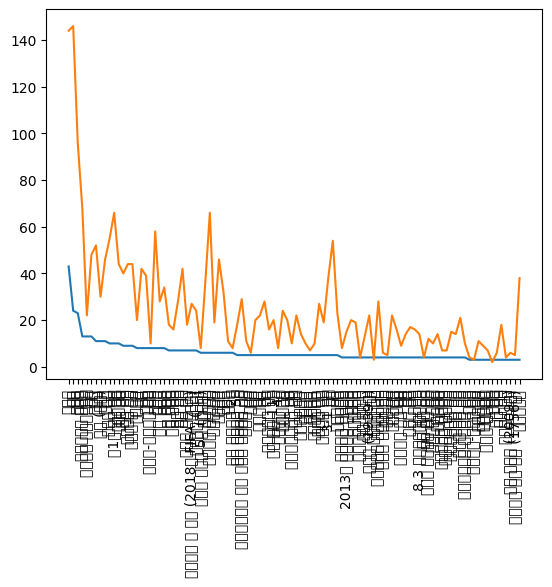

In [88]:
plt.plot(list(mg_100['title']), list(mg_100['count_train']),list(mg_100['title']), list(mg_100['count_wiki']))
plt.xticks(rotation = 90)
plt.show()

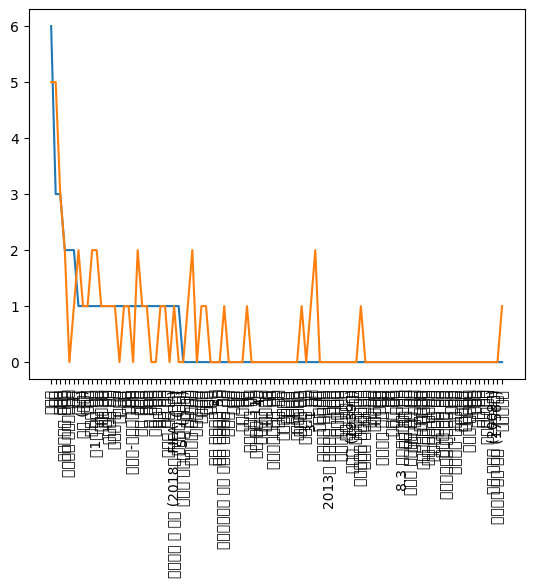

In [87]:
plt.plot(list(mg_100['title']), list(mg_100['count_train']//np.mean(mg_100['count_train'])),list(mg_100['title']), list(mg_100['count_wiki']//np.mean(mg_100['count_wiki'])))
plt.xticks(rotation = 90)
plt.show()

## Context Len 분석

### train

In [20]:
train_df['context_len'].describe()

count    3952.000000
mean      920.220648
std       356.500514
min       512.000000
25%       645.000000
50%       819.000000
75%      1099.250000
max      2059.000000
Name: context_len, dtype: float64

In [53]:
context_count= []
for i in range(0,210):
    context_count.append(len(train_df[(train_df['context_len']>i*10)&(train_df['context_len']<=(i+1)*10)]))

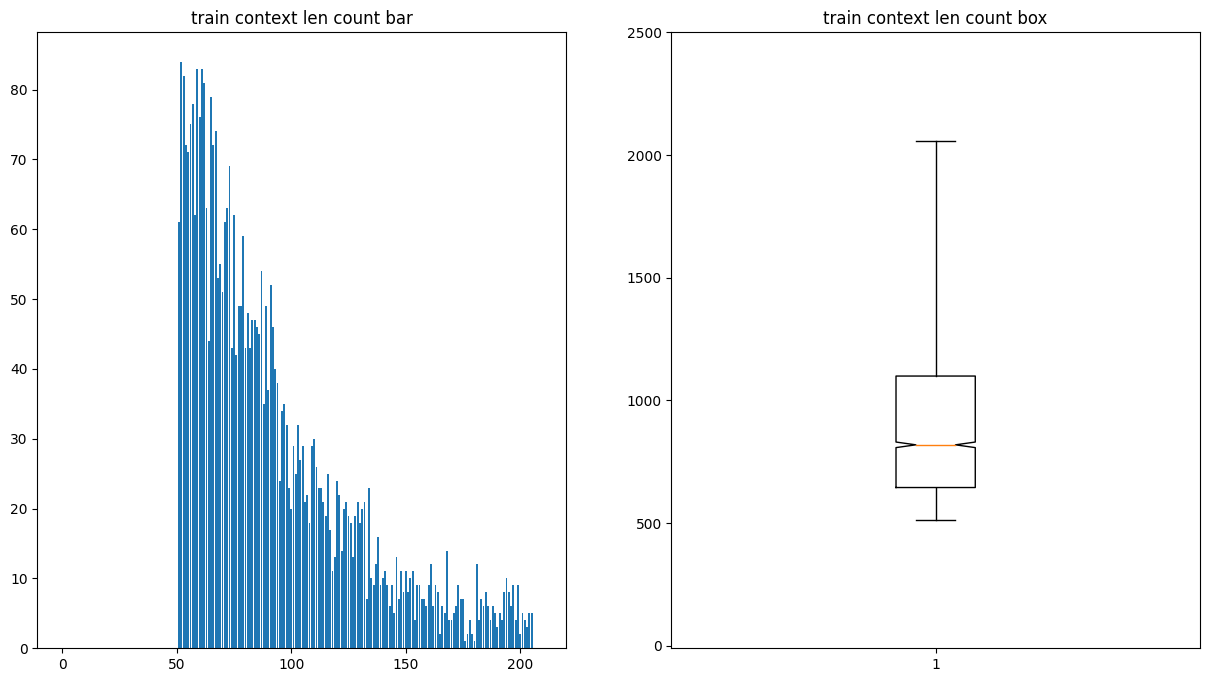

In [93]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,210),context_count)
ax1.set_title('train context len count bar')
ax2.boxplot([train_df['context_len']],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 2500.0)
ax2.set_xticks([1])
ax2.set_title('train context len count box')
plt.show()

### validation

In [90]:
val_df['context_len'].describe()

count     240.000000
mean      916.725000
std       360.032122
min       517.000000
25%       616.750000
50%       820.500000
75%      1107.250000
max      2064.000000
Name: context_len, dtype: float64

In [286]:
val_context_count= []
for i in range(0,210):
    val_context_count.append(len(val_df[(val_df['context_len']>i*10)&(val_df['context_len']<=(i+1)*10)]))

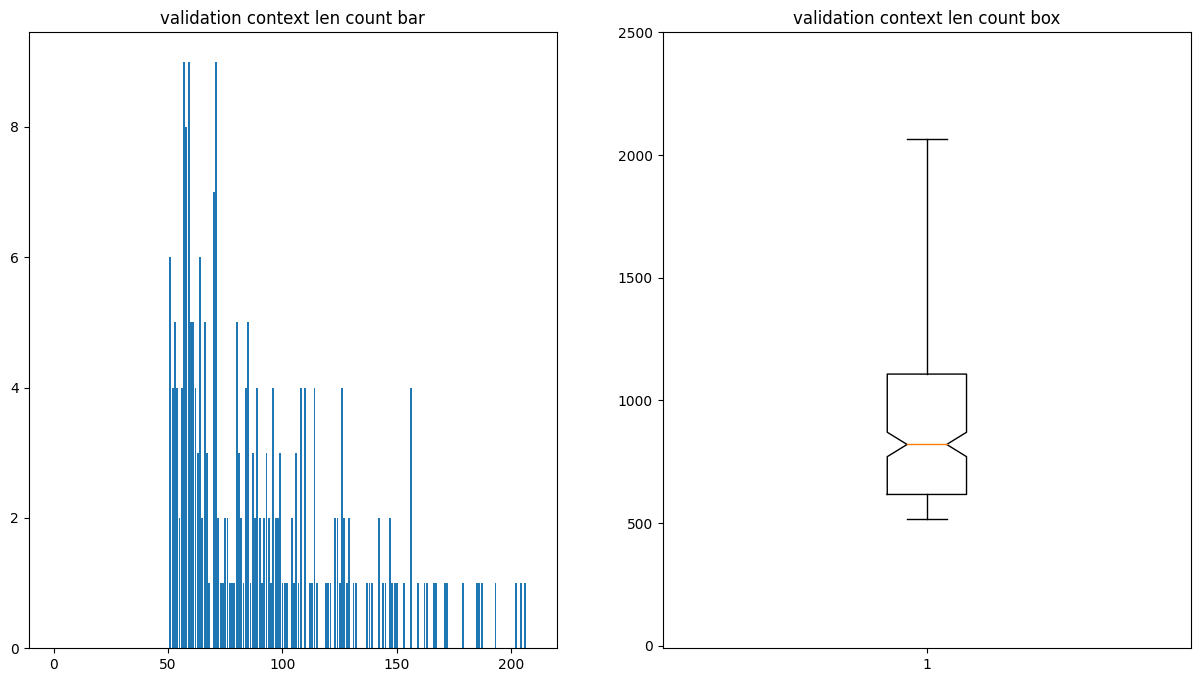

In [287]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,210),val_context_count)
ax1.set_title('validation context len count bar')
ax2.boxplot([val_df['context_len']],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 2500.0)
ax2.set_xticks([1])
ax2.set_title('validation context len count box')
plt.show()

### wiki

In [101]:
wiki_df['text_len'].describe()

count    60613.000000
mean       755.565044
std        762.962671
min        184.000000
25%        414.000000
50%        577.000000
75%        857.000000
max      46099.000000
Name: text_len, dtype: float64

In [109]:
wiki_text_count= []
for i in range(0,500):
    wiki_text_count.append(len(wiki_df[(wiki_df['text_len']>i*10)&(wiki_df['text_len']<=(i+1)*10)]))

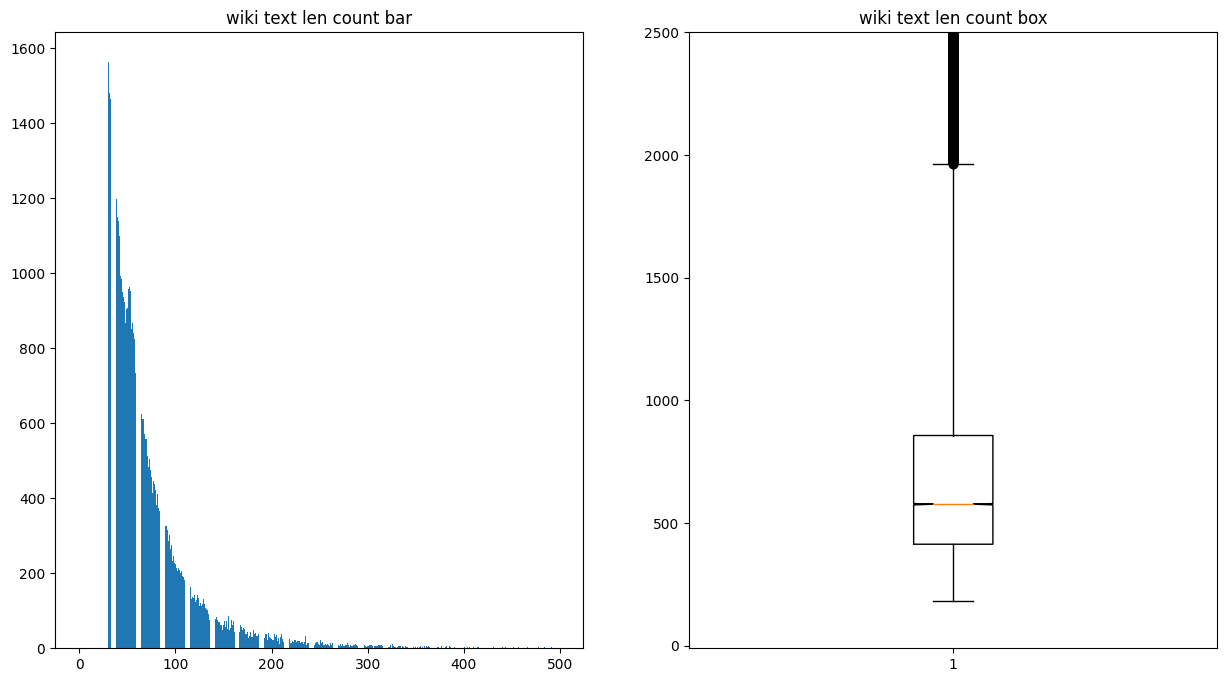

In [110]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,500),wiki_text_count)
ax1.set_title('wiki text len count bar')
ax2.boxplot([wiki_df['text_len']],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 2500.0)
ax2.set_xticks([1])
ax2.set_title('wiki text len count box')
plt.show()

In [114]:
len(wiki_df[wiki_df['text_len']>2000])

2102

In [117]:
len(wiki_df[wiki_df['text_len']>2000])/len(wiki_df)

0.034679029251150746

## question len 분석

### train

In [56]:
train_df['question_len'].describe()

count    3952.000000
mean       29.322368
std         8.727421
min         8.000000
25%        23.000000
50%        29.000000
75%        35.000000
max        78.000000
Name: question_len, dtype: float64

In [136]:
question_count= []
for i in range(0,80):
    question_count.append(len(train_df[(train_df['question_len']>i*1)&(train_df['question_len']<=(i+1)*1)]))

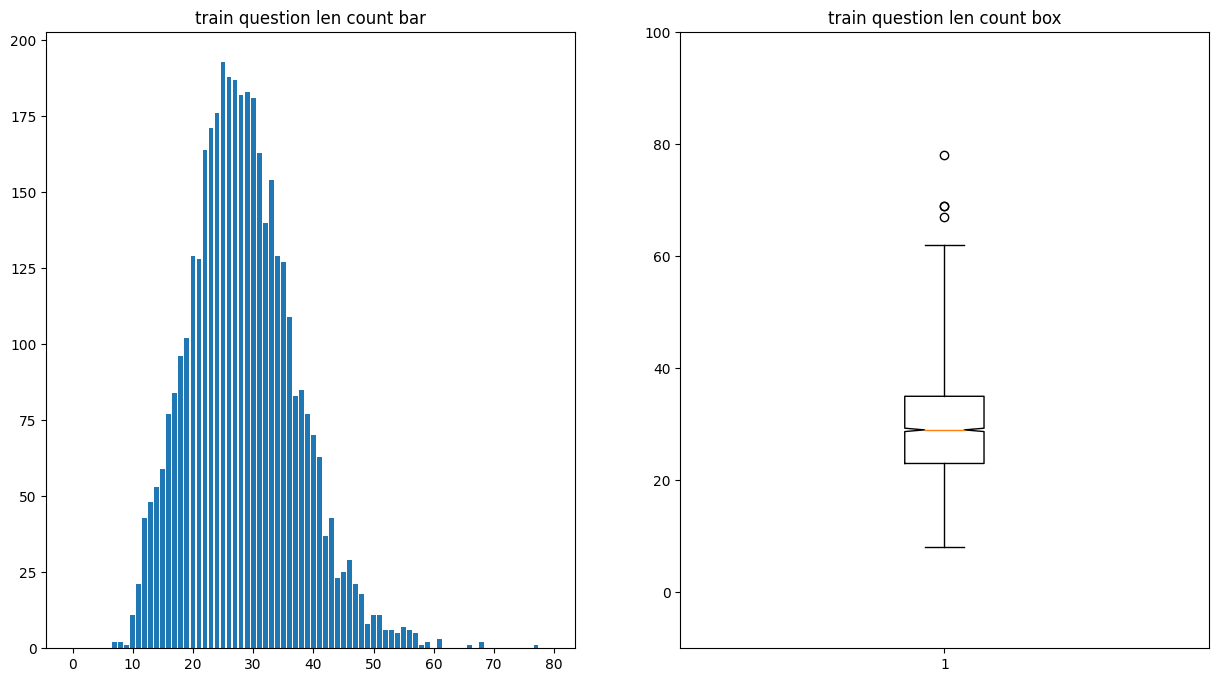

In [137]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,80),question_count)
ax1.set_title('train question len count bar')
ax2.boxplot([train_df['question_len']],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 100.0)
ax2.set_xticks([1])
ax2.set_title('train question len count box')
plt.show()

### validation

In [123]:
val_df['question_len'].describe()

count    240.000000
mean      29.195833
std        8.728301
min        9.000000
25%       23.000000
50%       29.000000
75%       35.000000
max       59.000000
Name: question_len, dtype: float64

In [124]:
question_val= []
for i in range(0,80):
    question_val.append(len(val_df[(val_df['question_len']>i*1)&(val_df['question_len']<=(i+1)*1)]))

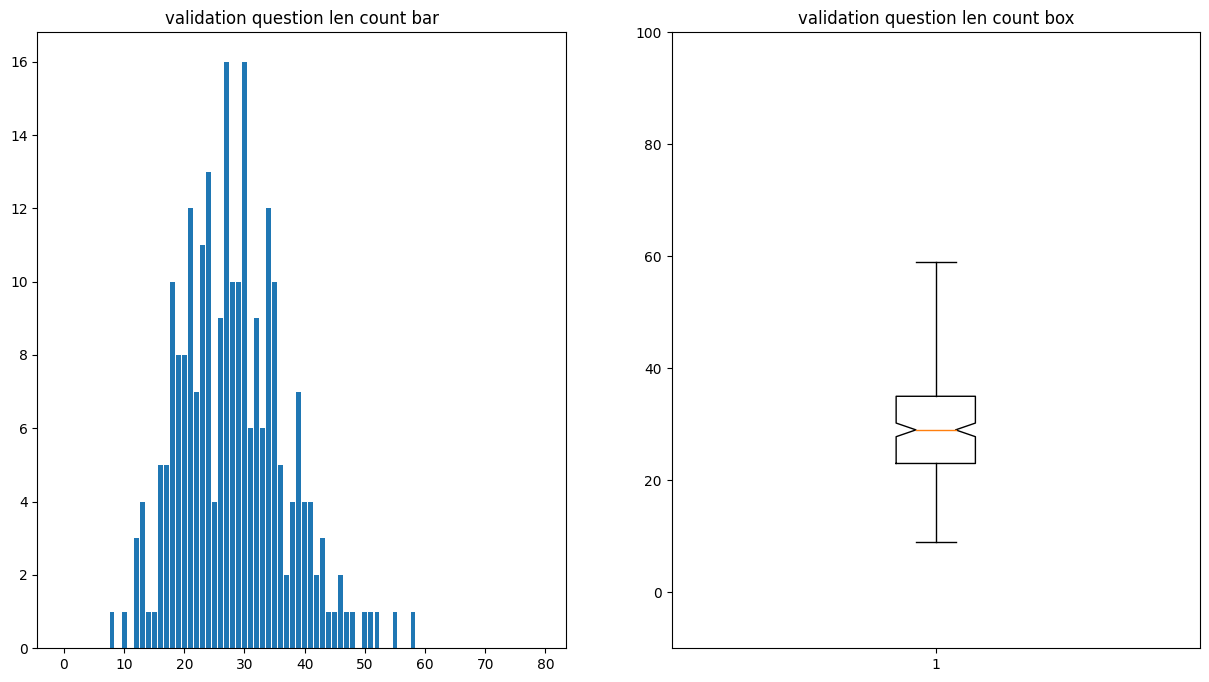

In [134]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,80),question_val)
ax1.set_title('validation question len count bar')
ax2.boxplot([val_df['question_len']],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 100.0)
ax2.set_xticks([1])
ax2.set_title('validation question len count box')
plt.show()

### test

In [120]:
test_df['question_len'].describe()

count    600.000000
mean      29.555000
std        8.962376
min        8.000000
25%       23.000000
50%       29.000000
75%       35.000000
max       62.000000
Name: question_len, dtype: float64

In [121]:
question_test= []
for i in range(0,80):
    question_test.append(len(test_df[(test_df['question_len']>i*1)&(test_df['question_len']<=(i+1)*1)]))

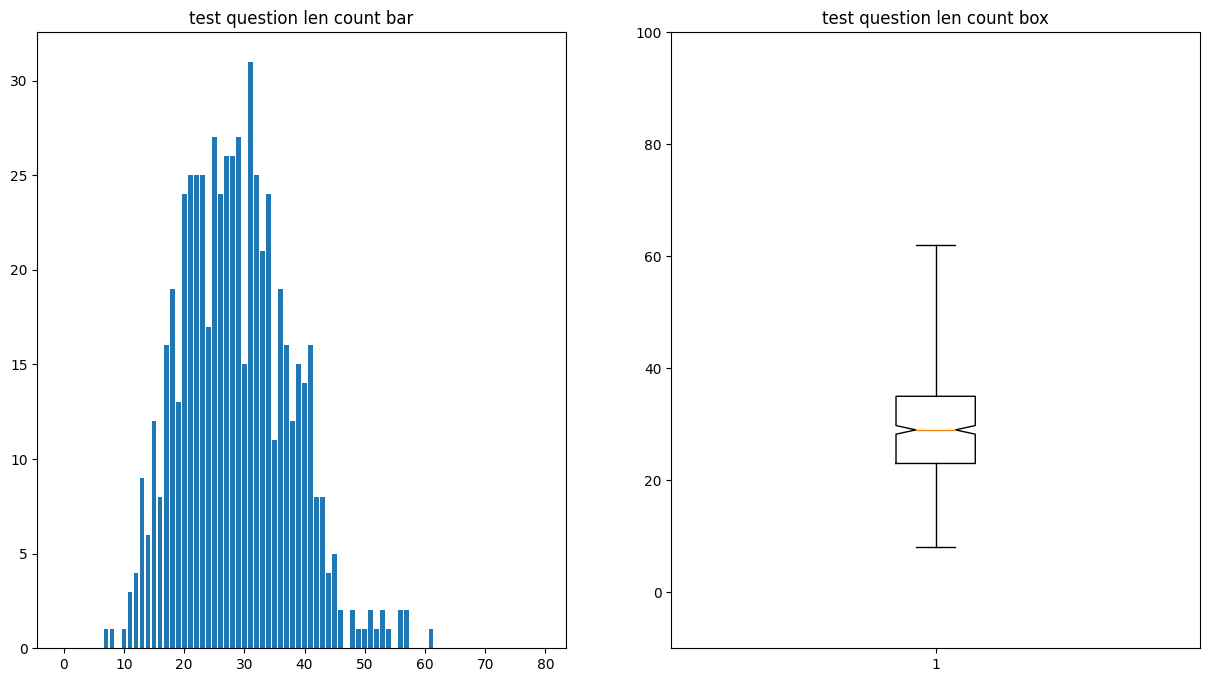

In [133]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,80),question_test)
ax1.set_title('test question len count bar')
ax2.boxplot([test_df['question_len']],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 100.0)
ax2.set_xticks([1])
ax2.set_title('test question len count box')
plt.show()

## answer len 분석

### train

In [131]:
train_df['answer_len'].describe()

count    3952.000000
mean        6.275051
std         5.346842
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        83.000000
Name: answer_len, dtype: float64

In [141]:
train_answer= []
for i in range(0,50):
    train_answer.append(len(train_df[(train_df['answer_len']>i*1)&(train_df['answer_len']<=(i+1)*1)]))

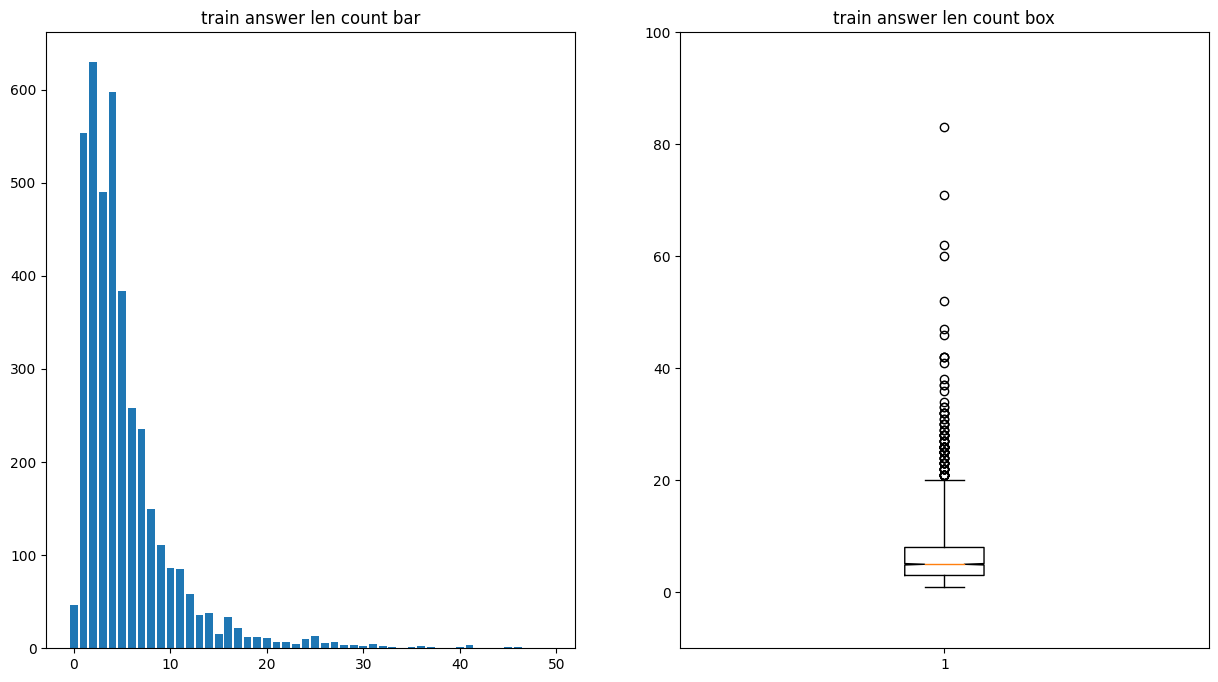

In [142]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,50),train_answer)
ax1.set_title('train answer len count bar')
ax2.boxplot([train_df['answer_len']],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 100.0)
ax2.set_xticks([1])
ax2.set_title('train answer len count box')
plt.show()

In [148]:
len(train_df)

3952

In [147]:
len(train_df[train_df['answer_len']>30])

25

### validation

In [143]:
val_df['answer_len'].describe()

count    240.000000
mean       6.912500
std        6.858755
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       64.000000
Name: answer_len, dtype: float64

In [144]:
val_answer= []
for i in range(0,50):
    val_answer.append(len(val_df[(val_df['answer_len']>i*1)&(val_df['answer_len']<=(i+1)*1)]))

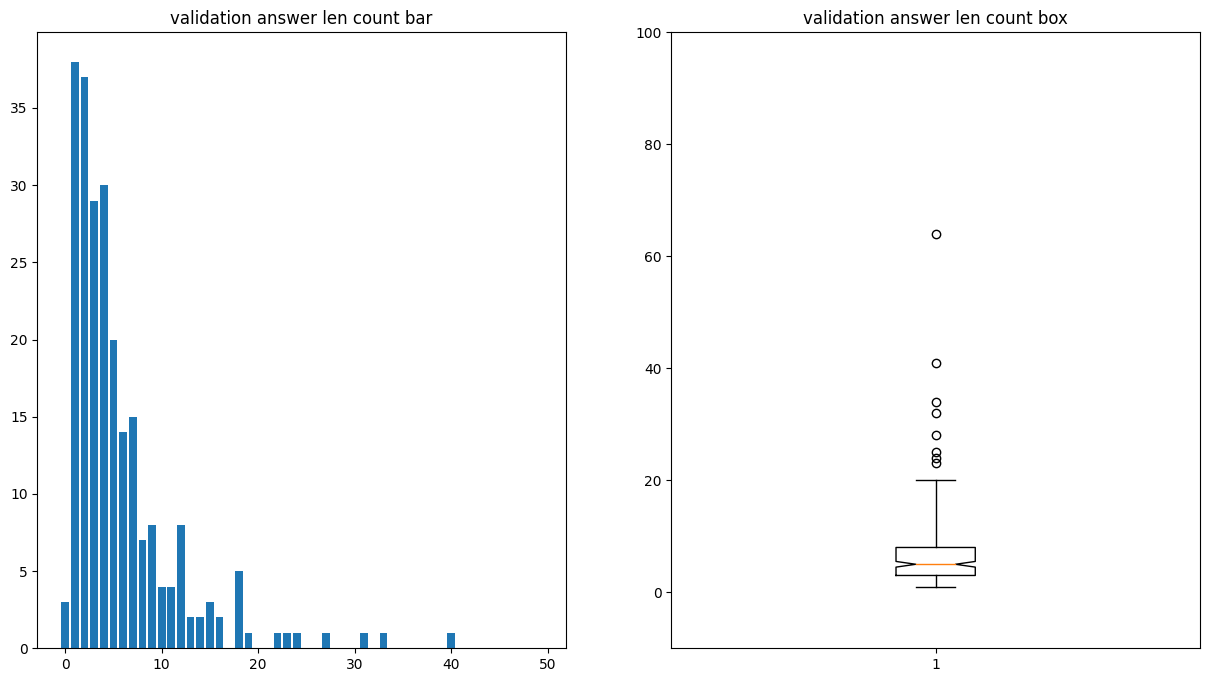

In [145]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,50),val_answer)
ax1.set_title('validation answer len count bar')
ax2.boxplot([val_df['answer_len']],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 100.0)
ax2.set_xticks([1])
ax2.set_title('validation answer len count box')
plt.show()

In [149]:
len(val_df)

240

In [150]:
len(val_df[val_df['answer_len']>30])

4

## tokenizer comparison

### preprocess callup

In [185]:
from transformers import AutoTokenizer
# 어떤 토크나이저에 따라 길이는 달라집니다. 항상 
tokenizer1 = AutoTokenizer.from_pretrained('klue/bert-base')
tokenizer2 = AutoTokenizer.from_pretrained('klue/roberta-large')
tokenizer3 = AutoTokenizer.from_pretrained('xlm-roberta-large')
tokenizer4 = AutoTokenizer.from_pretrained('monologg/kobigbird-bert-base')
tokenizer5 = AutoTokenizer.from_pretrained('monologg/koelectra-base-v3-finetuned-korquad')

### train

In [186]:
test_no =random.randint(0,len(train_df))

In [187]:
test_context = train_df['context'][test_no]
test_context

'모로는 예술의 스승 이상으로 정신적인 선배이며 때로는 동지나 친구로서 마음의 지주가 되었다. 이것은 모로의 사후(死後)(1898)에 많은 제자 가운데서 뽑혀 루오가 \'모로 미술관\'의 관장이 되어 스승의 유작을 관리하는 지위에 오랜 기간 머물렀다는 것으로 알 수 있다. 모로는 루오가 성장한 베르빌의 주민들에 대하여 이렇게 말하고 있다.\\n\\n\'그들은 본질적으로 어둡고 과묵한 종교예술의 애호자이다.\' 이러한 지적은 루오의 장래를 멀리 예견하고 있었다. 모로의 사후 루오의 시야에는 포랭과 로트렉 및 도미에가 뚜렷하게 부각되었고, 모두가 사회 비판의 경향이 농후한 화가들이었다. 또한 가톨릭의 문필가 위스망스와 레온 블르와와의 교우는 루오의 종교적인 인생관에 결정적인 계기가 되었다.\\n\\n가난하고 학대받는 자들에 대한 공감, 부자나 권력자를 향한 분노는 루오에 있어서의 깊은 종교적인 감정에서 유래한다. "가령 창부를 그리는 경우 루오는 이 죄많은 여인이 풍기는 전율할 향기에 취하는 것이 아니고 그녀의 죄에 울고 그녀와 더불어 괴로와하는 것이다(美術史家 드리발)." 세대적인 관점에서 본다면 루오는 포비슴의 와중에 있지만 밝게 삶을 구가하는 그들과는 대극(對極)의 위치에 있었다. 루오의 신앙과 그에 입각한 예술관은 단도직입적(單刀直入的)이다.\\n\\n그는 "나는 손으로 만질 수 있는 것도, 눈으로 볼 수 있는 것도 믿지 않는다. 내가 믿는 것은 다만 눈에 보이지 않는 것, 즉 느낄 수 있는 것뿐이다." 그는 이처럼 비합리적 세계에서의 계시(啓示)를 어둔 밤 속에서는 빛나는 별을 인정하려 하였다. 그리하여 그의 예술적 탐구는 완성에 도달하기 위해서가 아니고 완성해 낼 수 없는 것의 극(極)을 다하기 위하여 행해진 것이다. 왜냐하면 그에게 있어서 \'참다운 예술은 열렬한 고백을 토로할 수 있는 까닭에 가치를 갖는\' 것이었기 때문이다.\\n\\n그것은 암야(暗夜)의 절규이며 자기도 모르게 새어나오는 울음소리와 같은 것이다. 이러한 영혼의 극점에 서서 루오는 

In [207]:
test_question = train_df['question'][test_no]
test_question

'포랭과 로트렉, 도미에의 공통된 성향은?'

In [209]:
test_answer = train_df['answers'][test_no]['text'][0]
test_answer

'사회 비판'

#### klue/bert-base

In [221]:
tokenizer1

PreTrainedTokenizerFast(name_or_path='klue/bert-base', vocab_size=32000, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [188]:
" ".join(tokenizer1.tokenize(test_context))

Token indices sequence length is longer than the specified maximum sequence length for this model (1038 > 512). Running this sequence through the model will result in indexing errors


'모로 ##는 예술 ##의 스승 이상 ##으로 정신 ##적인 선배 ##이 ##며 때로 ##는 동지 ##나 친구 ##로 ##서 마음 ##의 지주 ##가 되 ##었 ##다 . 이것 ##은 모로 ##의 사후 ( 死 後 ) ( 1898 ) 에 많 ##은 제자 가운데 ##서 뽑혀 루 ##오 ##가 \' 모로 미술관 \' 의 관장 ##이 되 ##어 스승 ##의 유 ##작 ##을 관리 ##하 ##는 지위 ##에 오랜 기간 머물렀 ##다는 것 ##으로 알 수 있 ##다 . 모로 ##는 루 ##오 ##가 성장 ##한 베르 ##빌 ##의 주민 ##들 ##에 대하 ##여 이렇게 말 ##하고 있 ##다 . [UNK] n [UNK] n \' 그 ##들 ##은 본질 ##적으로 어둡 ##고 과 ##묵 ##한 종교 ##예술 ##의 애호 ##자 ##이다 . \' 이러 ##한 지적 ##은 루 ##오 ##의 장래 ##를 멀리 예견 ##하고 있 ##었 ##다 . 모로 ##의 사후 루 ##오 ##의 시야 ##에 ##는 포 ##랭 ##과 로 ##트 ##렉 및 도미 ##에 ##가 뚜렷 ##하 ##게 부각 ##되 ##었 ##고 , 모두 ##가 사회 비판 ##의 경향 ##이 농 ##후 ##한 화가 ##들이 ##었 ##다 . 또한 가톨릭 ##의 문 ##필 ##가 위스 ##망 ##스 ##와 레 ##온 블 ##르 ##와 ##와 ##의 교우 ##는 루 ##오 ##의 종교 ##적인 인생 ##관 ##에 결정 ##적인 계기 ##가 되 ##었 ##다 . [UNK] n [UNK] n ##가 ##난 ##하고 학대 ##받 ##는 자 ##들 ##에 대한 공감 , 부자 ##나 권력자 ##를 향한 분노 ##는 루 ##오 ##에 있 ##어 ##서 ##의 깊 ##은 종교 ##적인 감정 ##에서 유래 ##한다 . " 가령 창 ##부 ##를 그리 ##는 경우 루 ##오 ##는 이 죄 ##많 ##은 여인 ##이 풍기 ##는 전 ##율 ##할 향기 ##에 취하 ##는 것 ##이 아니 ##고 그녀 ##의 죄 ##에 울 ##고 그녀 ##와 더

In [210]:
" ".join(tokenizer1.tokenize(test_question))

'포 ##랭 ##과 로 ##트 ##렉 , 도미 ##에 ##의 공통 ##된 성향 ##은 ?'

In [211]:
" ".join(tokenizer1.tokenize(test_answer))

'사회 비판'

In [212]:
tokenizer1_context_len=train_df['context'].apply(lambda x: len("".join(tokenizer1.tokenize(x))))
tokenizer1_question_len=train_df['question'].apply(lambda x: len("".join(tokenizer1.tokenize(x))))
tokenizer1_answer_len=train_df['answers'].apply(lambda x: len("".join(tokenizer1.tokenize(x['text'][0]))))

In [229]:
tokenizer1_context_len.describe()

count    3952.000000
mean     1227.553897
std       481.790105
min       585.000000
25%       855.000000
50%      1092.500000
75%      1466.000000
max      2983.000000
Name: context, dtype: float64

In [230]:
tokenizer1_question_len.describe()

count    3952.000000
mean       39.786184
std        11.638009
min        11.000000
25%        32.000000
50%        39.000000
75%        47.000000
max       106.000000
Name: question, dtype: float64

In [231]:
tokenizer1_answer_len.describe()

count    3952.000000
mean        8.782136
std         7.240760
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max       114.000000
Name: answers, dtype: float64

In [243]:
tokenizer1_context_list= []
for i in range(0,300):
    tokenizer1_context_list.append(sum(tokenizer1_context_len<=(i+1)*10)-sum(tokenizer1_context_len<=(i)*10))

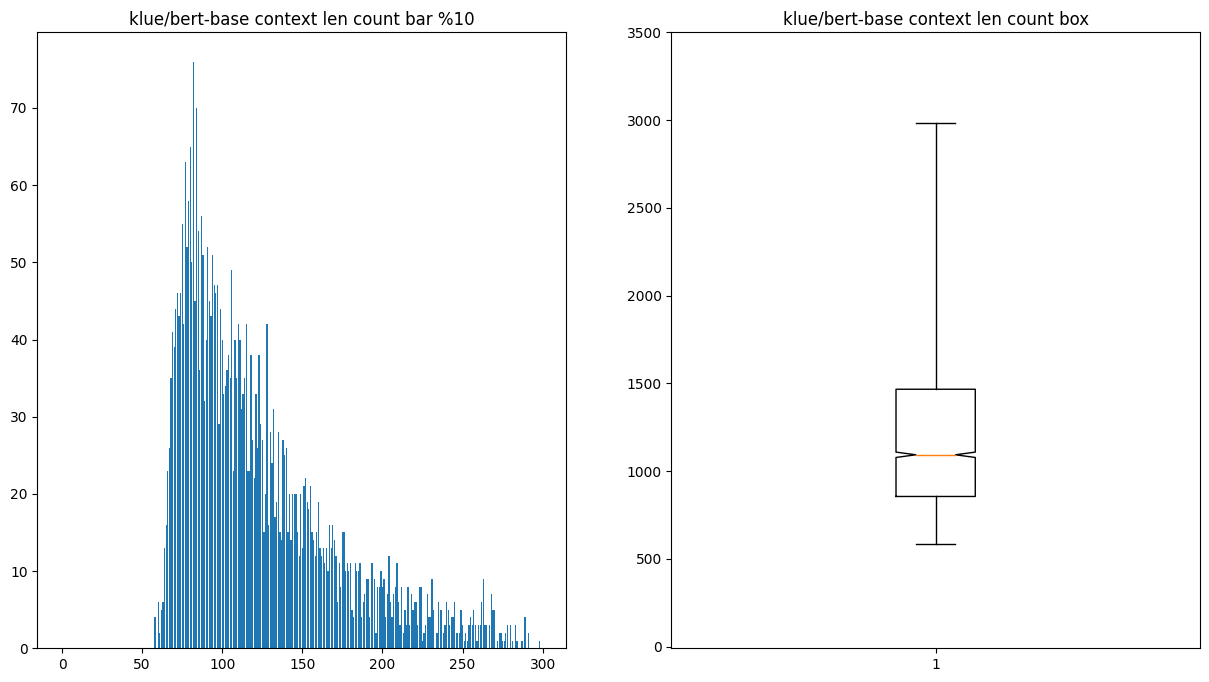

In [256]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,300),tokenizer1_context_list)
ax1.set_title('klue/bert-base context len count bar %10')
ax2.boxplot([tokenizer1_context_len],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 3500.0)
ax2.set_xticks([1])
ax2.set_title('klue/bert-base context len count box')
plt.show()

#### klue/roberta-large

In [222]:
tokenizer2

PreTrainedTokenizerFast(name_or_path='klue/roberta-large', vocab_size=32000, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [189]:
" ".join(tokenizer2.tokenize(test_context))

Token indices sequence length is longer than the specified maximum sequence length for this model (1038 > 512). Running this sequence through the model will result in indexing errors


'모로 ##는 예술 ##의 스승 이상 ##으로 정신 ##적인 선배 ##이 ##며 때로 ##는 동지 ##나 친구 ##로 ##서 마음 ##의 지주 ##가 되 ##었 ##다 . 이것 ##은 모로 ##의 사후 ( 死 後 ) ( 1898 ) 에 많 ##은 제자 가운데 ##서 뽑혀 루 ##오 ##가 \' 모로 미술관 \' 의 관장 ##이 되 ##어 스승 ##의 유 ##작 ##을 관리 ##하 ##는 지위 ##에 오랜 기간 머물렀 ##다는 것 ##으로 알 수 있 ##다 . 모로 ##는 루 ##오 ##가 성장 ##한 베르 ##빌 ##의 주민 ##들 ##에 대하 ##여 이렇게 말 ##하고 있 ##다 . [UNK] n [UNK] n \' 그 ##들 ##은 본질 ##적으로 어둡 ##고 과 ##묵 ##한 종교 ##예술 ##의 애호 ##자 ##이다 . \' 이러 ##한 지적 ##은 루 ##오 ##의 장래 ##를 멀리 예견 ##하고 있 ##었 ##다 . 모로 ##의 사후 루 ##오 ##의 시야 ##에 ##는 포 ##랭 ##과 로 ##트 ##렉 및 도미 ##에 ##가 뚜렷 ##하 ##게 부각 ##되 ##었 ##고 , 모두 ##가 사회 비판 ##의 경향 ##이 농 ##후 ##한 화가 ##들이 ##었 ##다 . 또한 가톨릭 ##의 문 ##필 ##가 위스 ##망 ##스 ##와 레 ##온 블 ##르 ##와 ##와 ##의 교우 ##는 루 ##오 ##의 종교 ##적인 인생 ##관 ##에 결정 ##적인 계기 ##가 되 ##었 ##다 . [UNK] n [UNK] n ##가 ##난 ##하고 학대 ##받 ##는 자 ##들 ##에 대한 공감 , 부자 ##나 권력자 ##를 향한 분노 ##는 루 ##오 ##에 있 ##어 ##서 ##의 깊 ##은 종교 ##적인 감정 ##에서 유래 ##한다 . " 가령 창 ##부 ##를 그리 ##는 경우 루 ##오 ##는 이 죄 ##많 ##은 여인 ##이 풍기 ##는 전 ##율 ##할 향기 ##에 취하 ##는 것 ##이 아니 ##고 그녀 ##의 죄 ##에 울 ##고 그녀 ##와 더

In [213]:
" ".join(tokenizer2.tokenize(test_question))

'포 ##랭 ##과 로 ##트 ##렉 , 도미 ##에 ##의 공통 ##된 성향 ##은 ?'

In [214]:
" ".join(tokenizer2.tokenize(test_answer))

'사회 비판'

In [249]:
tokenizer2_context_len=train_df['context'].apply(lambda x: len("".join(tokenizer2.tokenize(x))))
tokenizer2_question_len=train_df['question'].apply(lambda x: len("".join(tokenizer2.tokenize(x))))
tokenizer2_answer_len=train_df['answers'].apply(lambda x: len("".join(tokenizer2.tokenize(x['text'][0]))))

In [250]:
tokenizer2_context_len.describe()

count    3952.000000
mean     1227.553897
std       481.790105
min       585.000000
25%       855.000000
50%      1092.500000
75%      1466.000000
max      2983.000000
Name: context, dtype: float64

In [251]:
tokenizer2_question_len.describe()

count    3952.000000
mean       39.786184
std        11.638009
min        11.000000
25%        32.000000
50%        39.000000
75%        47.000000
max       106.000000
Name: question, dtype: float64

In [252]:
tokenizer2_answer_len.describe()

count    3952.000000
mean        8.782136
std         7.240760
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max       114.000000
Name: answers, dtype: float64

In [253]:
tokenizer2_context_list= []
for i in range(0,300):
    tokenizer2_context_list.append(sum(tokenizer2_context_len<=(i+1)*10)-sum(tokenizer2_context_len<=(i)*10))

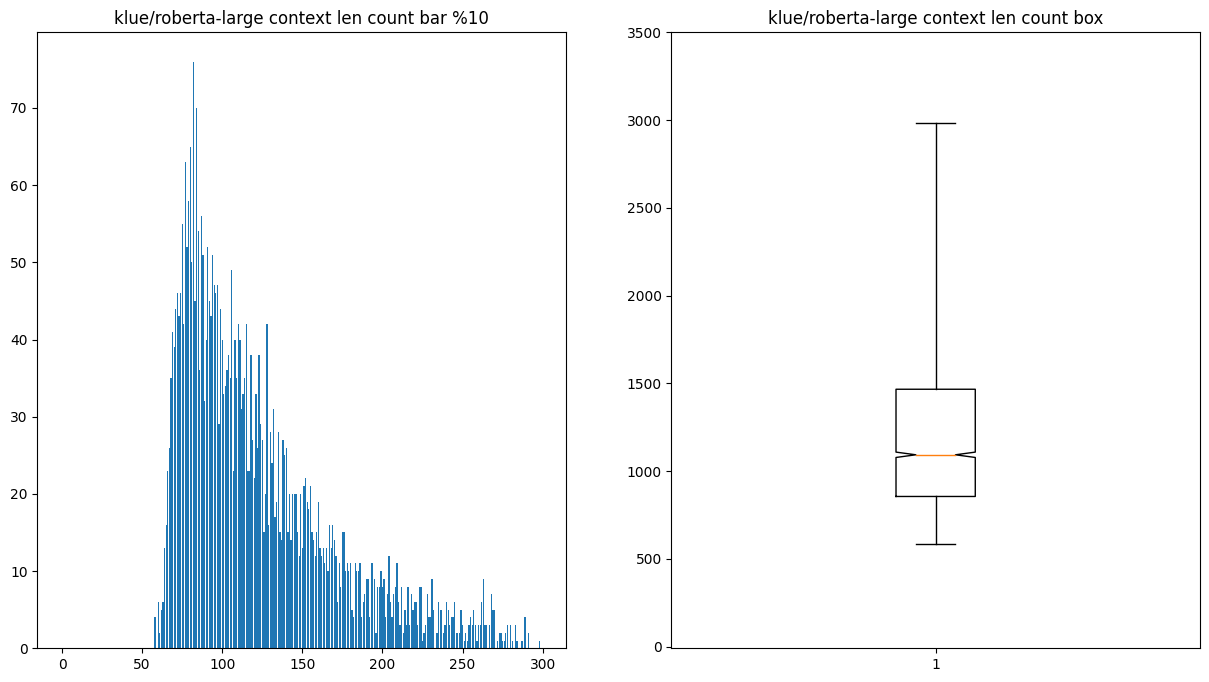

In [255]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,300),tokenizer2_context_list)
ax1.set_title('klue/roberta-large context len count bar %10')
ax2.boxplot([tokenizer2_context_len],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 3500.0)
ax2.set_xticks([1])
ax2.set_title('klue/roberta-large context len count box')
plt.show()

In [280]:
tokenizer2_context_val=val_df['context'].apply(lambda x: len("".join(tokenizer2.tokenize(x))))
tokenizer2_question_val=val_df['question'].apply(lambda x: len("".join(tokenizer2.tokenize(x))))
tokenizer2_answer_val=val_df['answers'].apply(lambda x: len("".join(tokenizer2.tokenize(x['text'][0]))))

In [281]:
tokenizer2_context_val.describe()

count     240.000000
mean     1222.441667
std       488.198804
min       634.000000
25%       833.500000
50%      1086.000000
75%      1451.750000
max      2818.000000
Name: context, dtype: float64

In [282]:
tokenizer2_question_val.describe()

count    240.000000
mean      39.587500
std       11.824052
min       12.000000
25%       31.000000
50%       38.000000
75%       47.000000
max       77.000000
Name: question, dtype: float64

In [283]:
tokenizer2_answer_val.describe()

count    240.000000
mean       9.375000
std        8.769062
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       78.000000
Name: answers, dtype: float64

In [284]:
tokenizer2_context_val_list= []
for i in range(0,300):
    tokenizer2_context_val_list.append(sum(tokenizer2_context_val<=(i+1)*10)-sum(tokenizer2_context_val<=(i)*10))

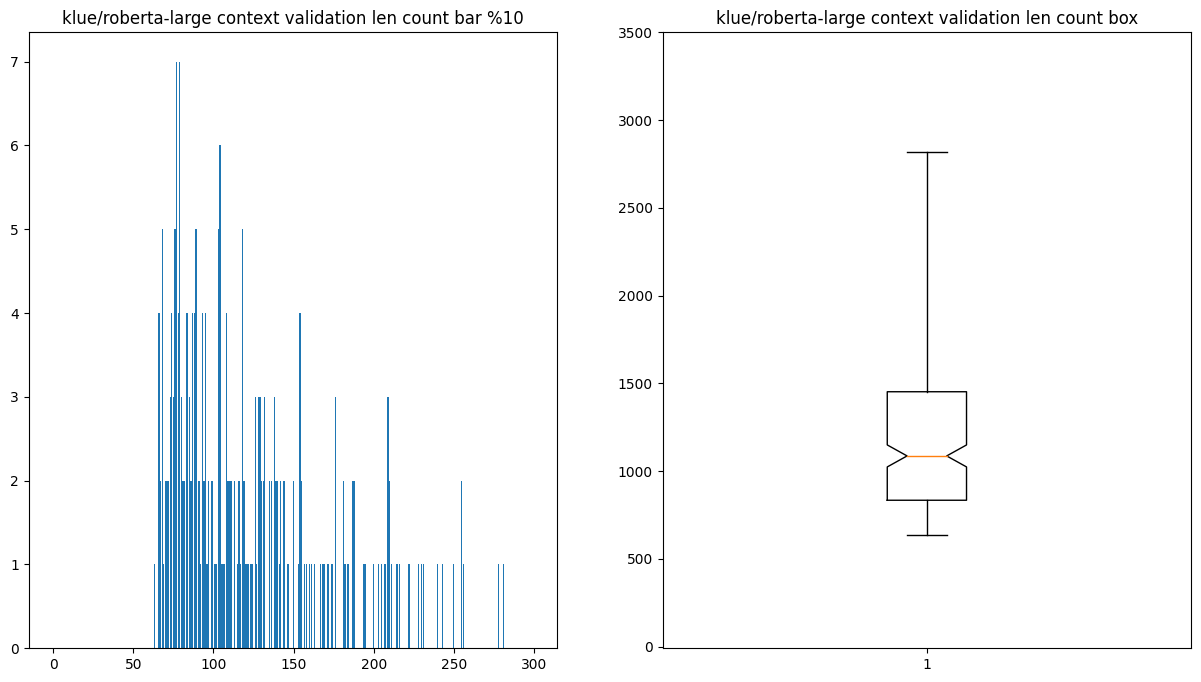

In [285]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,300),tokenizer2_context_val_list)
ax1.set_title('klue/roberta-large context validation len count bar %10')
ax2.boxplot([tokenizer2_context_val],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 3500.0)
ax2.set_xticks([1])
ax2.set_title('klue/roberta-large context validation len count box')
plt.show()

#### xlm-roberta-large

In [223]:
tokenizer3

PreTrainedTokenizerFast(name_or_path='xlm-roberta-large', vocab_size=250002, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})

In [190]:
" ".join(tokenizer3.tokenize(test_context))

Token indices sequence length is longer than the specified maximum sequence length for this model (1044 > 512). Running this sequence through the model will result in indexing errors


'▁모 로는 ▁예술 의 ▁스 승 ▁이상 으로 ▁정신 적인 ▁선 배 이며 ▁때 로는 ▁동 지 나 ▁친구 로서 ▁마음 의 ▁지 주 가 ▁되었다 . ▁이것은 ▁모 로 의 ▁사 후 ( 死 後 ) (18 98) 에 ▁많은 ▁제 자 ▁가운데 서 ▁ 뽑 혀 ▁루 오 가 ▁\' 모 로 ▁ 미술 관 \' 의 ▁관 장이 ▁되어 ▁스 승 의 ▁유 작 을 ▁관리 하는 ▁지 위에 ▁오랜 ▁기간 ▁머 물 렀 다는 ▁것으로 ▁알 ▁수 ▁있다 . ▁모 로는 ▁루 오 가 ▁성장 한 ▁ 베르 빌 의 ▁주민들 에 ▁대하여 ▁이렇게 ▁말 하고 ▁있다 . \\ n \\ n \' 그 들은 ▁본 질 적으로 ▁어 둡 고 ▁과 묵 한 ▁종교 예술 의 ▁애 호 자 이다 . \' ▁이러한 ▁지적 은 ▁루 오 의 ▁장 래 를 ▁멀리 ▁예 견 하고 ▁있었다 . ▁모 로 의 ▁사 후 ▁루 오 의 ▁시 야 에는 ▁포 랭 과 ▁로 트 렉 ▁및 ▁도 미 에 가 ▁ 뚜 렷 하게 ▁부 각 되었고 , ▁모두 가 ▁사회 ▁비판 의 ▁경 향 이 ▁농 후 한 ▁ 화가 들이 었다 . ▁또한 ▁가 톨 릭 의 ▁문 필 가 ▁위 스 망 스 와 ▁레 온 ▁ 블 르 와 와의 ▁교 우는 ▁루 오 의 ▁종교 적인 ▁인생 관 에 ▁결정 적인 ▁계 기가 ▁되었다 . \\ n \\ n 가 난 하고 ▁학 대 받 는 ▁자 들에 ▁대한 ▁공감 , ▁부 자 나 ▁권력 자를 ▁향 한 ▁분 노 는 ▁루 오 에 ▁있어서 의 ▁ 깊 은 ▁종교 적인 ▁감정 에서 ▁유 래 한다 . ▁" 가 령 ▁창 부를 ▁그리 는 ▁경우 ▁루 오는 ▁이 ▁죄 많 은 ▁여 인이 ▁풍 기는 ▁전 율 할 ▁향 기에 ▁취 하는 ▁것이 ▁아니고 ▁그녀 의 ▁죄 에 ▁울 고 ▁그녀 와 ▁더불어 ▁ 괴 로 와 하는 ▁것이다 ( 美術 史 家 ▁ 드리 발 ). " ▁ 세대 적인 ▁관점 에서 ▁본 다면 ▁루 오는 ▁포 비 슴 의 ▁와 중 에 ▁있지만 ▁ 밝 게 ▁삶을 ▁구 가 하는 ▁그 들과 는 ▁대 극 ( 對 極 ) 의 ▁위치 에 ▁있었다 . ▁루 오 의 ▁신앙 과 ▁그 에 ▁입 각 한 ▁예술 관

In [215]:
" ".join(tokenizer3.tokenize(test_question))

'▁포 랭 과 ▁로 트 렉 , ▁도 미 에 의 ▁공 통 된 ▁성 향 은 ?'

In [216]:
" ".join(tokenizer3.tokenize(test_answer))

'▁사회 ▁비판'

In [226]:
tokenizer3_context_len=train_df['context'].apply(lambda x: len("".join(tokenizer3.tokenize(x))))
tokenizer3_question_len=train_df['question'].apply(lambda x: len("".join(tokenizer3.tokenize(x))))
tokenizer3_answer_len=train_df['answers'].apply(lambda x: len("".join(tokenizer3.tokenize(x['text'][0]))))

In [257]:
tokenizer3_context_len.describe()

count    3952.000000
mean      921.261640
std       356.524645
min       513.000000
25%       646.000000
50%       820.000000
75%      1100.250000
max      2060.000000
Name: context, dtype: float64

In [258]:
tokenizer3_question_len.describe()

count    3952.000000
mean       30.322368
std         8.727421
min         9.000000
25%        24.000000
50%        30.000000
75%        36.000000
max        79.000000
Name: question, dtype: float64

In [259]:
tokenizer3_answer_len.describe()

count    3952.000000
mean        7.275051
std         5.346842
min         2.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        84.000000
Name: answers, dtype: float64

In [260]:
tokenizer3_context_list= []
for i in range(0,300):
    tokenizer3_context_list.append(sum(tokenizer3_context_len<=(i+1)*10)-sum(tokenizer3_context_len<=(i)*10))

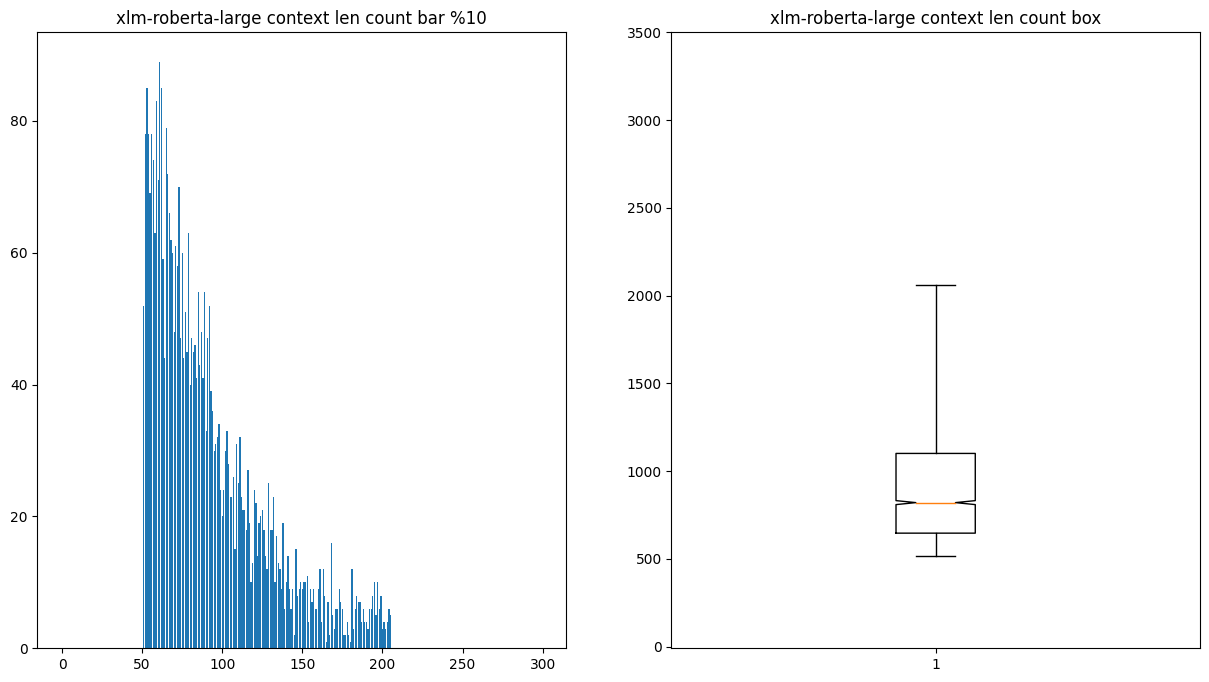

In [261]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,300),tokenizer3_context_list)
ax1.set_title('xlm-roberta-large context len count bar %10')
ax2.boxplot([tokenizer3_context_len],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 3500.0)
ax2.set_xticks([1])
ax2.set_title('xlm-roberta-large context len count box')
plt.show()

#### monologg/kobigbird-bert-base

In [224]:
tokenizer4

PreTrainedTokenizerFast(name_or_path='monologg/kobigbird-bert-base', vocab_size=32500, model_max_len=4096, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [191]:
" ".join(tokenizer4.tokenize(test_context))

'모로 ##는 예술 ##의 스승 이상 ##으로 정신 ##적 ##인 선배 ##이 ##며 때로 ##는 동지 ##나 친구 ##로 ##서 마음 ##의 지주 ##가 되 ##었 ##다 . 이것 ##은 모로 ##의 사후 ( 死 後 ) ( 1898 ) 에 많 ##은 제자 가운데 ##서 뽑 ##혀 루 ##오 ##가 \' 모로 미술관 \' 의 관장 ##이 되 ##어 스승 ##의 유 ##작 ##을 관리 ##하 ##는 지위 ##에 오랜 기간 머물렀 ##다는 것 ##으로 알 수 있 ##다 . 모로 ##는 루 ##오 ##가 성장 ##한 베르 ##빌 ##의 주민 ##들 ##에 대하 ##여 이렇게 말 ##하고 있 ##다 . \\ n \\ n \' 그 ##들 ##은 본질 ##적으로 어둡 ##고 과 ##묵 ##한 종교 ##예술 ##의 애호 ##자 ##이다 . \' 이러 ##한 지적 ##은 루 ##오 ##의 장래 ##를 멀리 예견 ##하고 있 ##었 ##다 . 모로 ##의 사후 루 ##오 ##의 시야 ##에 ##는 포 ##랭 ##과 로 ##트 ##렉 및 도미 ##에 ##가 뚜렷 ##하 ##게 부각 ##되 ##었 ##고 , 모두 ##가 사회 비판 ##의 경향 ##이 농 ##후 ##한 화가 ##들이 ##었 ##다 . 또한 가톨릭 ##의 문 ##필 ##가 위스 ##망 ##스 ##와 레온 블 ##르 ##와 ##와 ##의 교우 ##는 루 ##오 ##의 종교 ##적 ##인 인생 ##관 ##에 결정 ##적 ##인 계기 ##가 되 ##었 ##다 . \\ n \\ n ##가 ##난 ##하고 학대 ##받 ##는 자 ##들 ##에 대한 공감 , 부자 ##나 권력자 ##를 향한 분노 ##는 루 ##오 ##에 있 ##어 ##서 ##의 깊 ##은 종교 ##적 ##인 감정 ##에서 유래 ##한다 . " 가령 창 ##부 ##를 그리 ##는 경우 루 ##오 ##는 이 죄 ##많 ##은 여인 ##이 풍기 ##는 전 ##율 ##할 향기 ##에 취하 ##는 것 ##이 아니 ##고 그녀 ##의 죄 ##에 울 ##고 그녀 ##와 더

In [217]:
" ".join(tokenizer4.tokenize(test_question))

'포 ##랭 ##과 로 ##트 ##렉 , 도미 ##에 ##의 공통 ##된 성향 ##은 ?'

In [218]:
" ".join(tokenizer4.tokenize(test_answer))

'사회 비판'

In [227]:
tokenizer4_context_len=train_df['context'].apply(lambda x: len("".join(tokenizer4.tokenize(x))))
tokenizer4_question_len=train_df['question'].apply(lambda x: len("".join(tokenizer4.tokenize(x))))
tokenizer4_answer_len=train_df['answers'].apply(lambda x: len("".join(tokenizer4.tokenize(x['text'][0]))))

In [262]:
tokenizer4_context_len.describe()

count    3952.000000
mean     1203.216093
std       471.666280
min       577.000000
25%       839.000000
50%      1069.500000
75%      1442.000000
max      2917.000000
Name: context, dtype: float64

In [263]:
tokenizer4_question_len.describe()

count    3952.000000
mean       39.845142
std        11.671137
min        11.000000
25%        32.000000
50%        39.000000
75%        47.000000
max       106.000000
Name: question, dtype: float64

In [264]:
tokenizer4_answer_len.describe()

count    3952.000000
mean        8.712045
std         7.245772
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max       114.000000
Name: answers, dtype: float64

In [265]:
tokenizer4_context_list= []
for i in range(0,300):
    tokenizer4_context_list.append(sum(tokenizer4_context_len<=(i+1)*10)-sum(tokenizer4_context_len<=(i)*10))

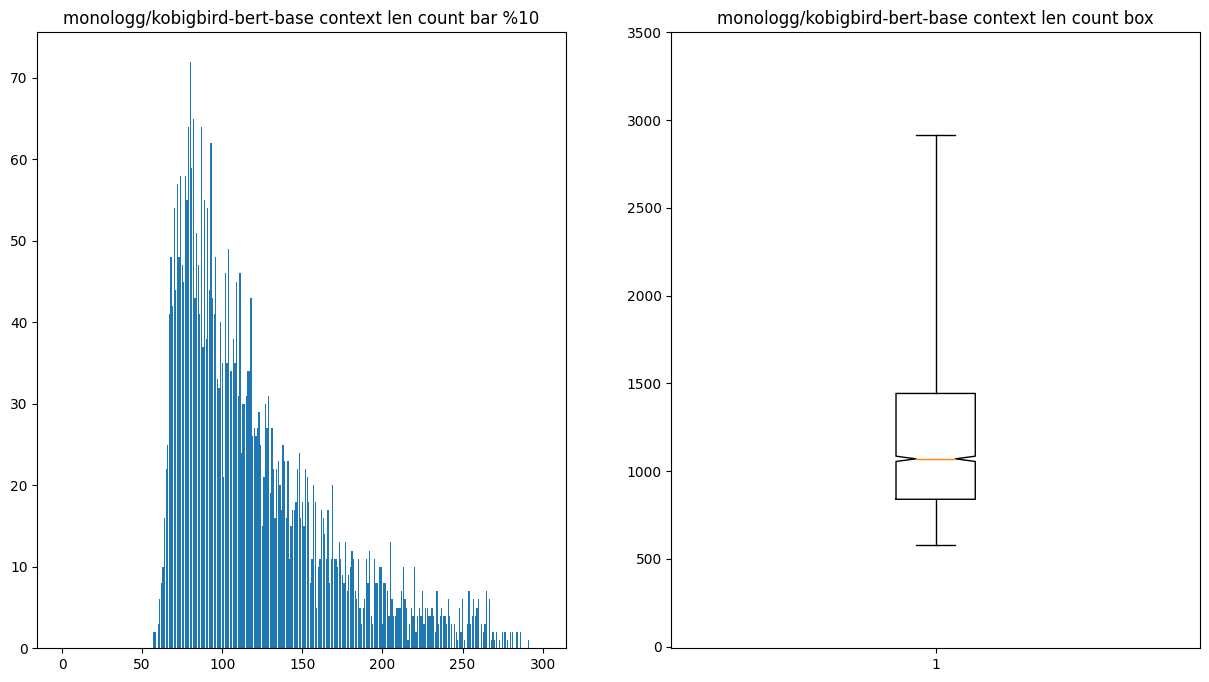

In [266]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,300),tokenizer4_context_list)
ax1.set_title('monologg/kobigbird-bert-base context len count bar %10')
ax2.boxplot([tokenizer4_context_len],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 3500.0)
ax2.set_xticks([1])
ax2.set_title('monologg/kobigbird-bert-base context len count box')
plt.show()

#### monologg/koelectra-base-v3-finetuned-korquad

In [225]:
tokenizer5

PreTrainedTokenizerFast(name_or_path='monologg/koelectra-base-v3-finetuned-korquad', vocab_size=35000, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [192]:
" ".join(tokenizer5.tokenize(test_context))

'모로 ##는 예술 ##의 스승 이상 ##으로 정신 ##적 ##인 선배 ##이 ##며 때로 ##는 동지 ##나 친구 ##로 ##서 마음 ##의 지주 ##가 되 ##었 ##다 . 이것 ##은 모로 ##의 사후 ( 死 後 ) ( 1898 ) 에 많 ##은 제자 가운데 ##서 뽑 ##혀 루 ##오 ##가 \' 모로 미술관 \' 의 관장 ##이 되 ##어 스승 ##의 유 ##작 ##을 관리 ##하 ##는 지위 ##에 오랜 기간 머물렀 ##다는 것 ##으로 알 수 있 ##다 . 모로 ##는 루 ##오 ##가 성장 ##한 베르 ##빌 ##의 주민 ##들 ##에 대하 ##여 이렇게 말 ##하 ##고 있 ##다 . \\ n \\ n \' 그 ##들 ##은 본질 ##적 ##으로 어둡 ##고 과 ##묵 ##한 종교 ##예술 ##의 애호 ##자 ##이다 . \' 이러 ##한 지적 ##은 루 ##오 ##의 장래 ##를 멀리 예견 ##하 ##고 있 ##었 ##다 . 모로 ##의 사후 루 ##오 ##의 시야 ##에 ##는 포 ##랭 ##과 로 ##트 ##렉 및 도미 ##에 ##가 뚜렷 ##하 ##게 부각 ##되 ##었 ##고 , 모두 ##가 사회 비판 ##의 경향 ##이 농 ##후 ##한 화가 ##들이 ##었 ##다 . 또한 가톨릭 ##의 문 ##필 ##가 위스 ##망 ##스 ##와 레온 블 ##르 ##와 ##와 ##의 교 ##우 ##는 루 ##오 ##의 종교 ##적 ##인 인생 ##관 ##에 결정 ##적 ##인 계기 ##가 되 ##었 ##다 . \\ n \\ n ##가 ##난 ##하 ##고 학대 ##받 ##는 자들 ##에 대한 공감 , 부자 ##나 권력자 ##를 향한 분노 ##는 루 ##오 ##에 있 ##어 ##서 ##의 깊 ##은 종교 ##적 ##인 감정 ##에 ##서 유래 ##한다 . " 가령 창 ##부 ##를 그리 ##는 경우 루 ##오 ##는 이 죄 ##많 ##은 여인 ##이 풍기 ##는 전 ##율 ##할 향기 ##에 취하 ##는 것 ##이 아니 ##고 그녀 ##의 죄 ##에

In [219]:
" ".join(tokenizer5.tokenize(test_question))

'포 ##랭 ##과 로 ##트 ##렉 , 도미 ##에 ##의 공통 ##된 성향 ##은 ?'

In [220]:
" ".join(tokenizer5.tokenize(test_answer))

'사회 비판'

In [228]:
tokenizer5_context_len=train_df['context'].apply(lambda x: len("".join(tokenizer5.tokenize(x))))
tokenizer5_question_len=train_df['question'].apply(lambda x: len("".join(tokenizer5.tokenize(x))))
tokenizer5_answer_len=train_df['answers'].apply(lambda x: len("".join(tokenizer5.tokenize(x['text'][0]))))

In [267]:
tokenizer5_context_len.describe()

count    3952.000000
mean     1211.661437
std       475.116908
min       585.000000
25%       845.000000
50%      1074.000000
75%      1452.250000
max      2965.000000
Name: context, dtype: float64

In [268]:
tokenizer5_question_len.describe()

count    3952.000000
mean       40.145749
std        11.863008
min        11.000000
25%        32.000000
50%        39.000000
75%        48.000000
max       108.000000
Name: question, dtype: float64

In [269]:
tokenizer5_answer_len.describe()

count    3952.000000
mean        8.692055
std         7.204259
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max       114.000000
Name: answers, dtype: float64

In [270]:
tokenizer5_context_list= []
for i in range(0,300):
    tokenizer5_context_list.append(sum(tokenizer5_context_len<=(i+1)*10)-sum(tokenizer5_context_len<=(i)*10))

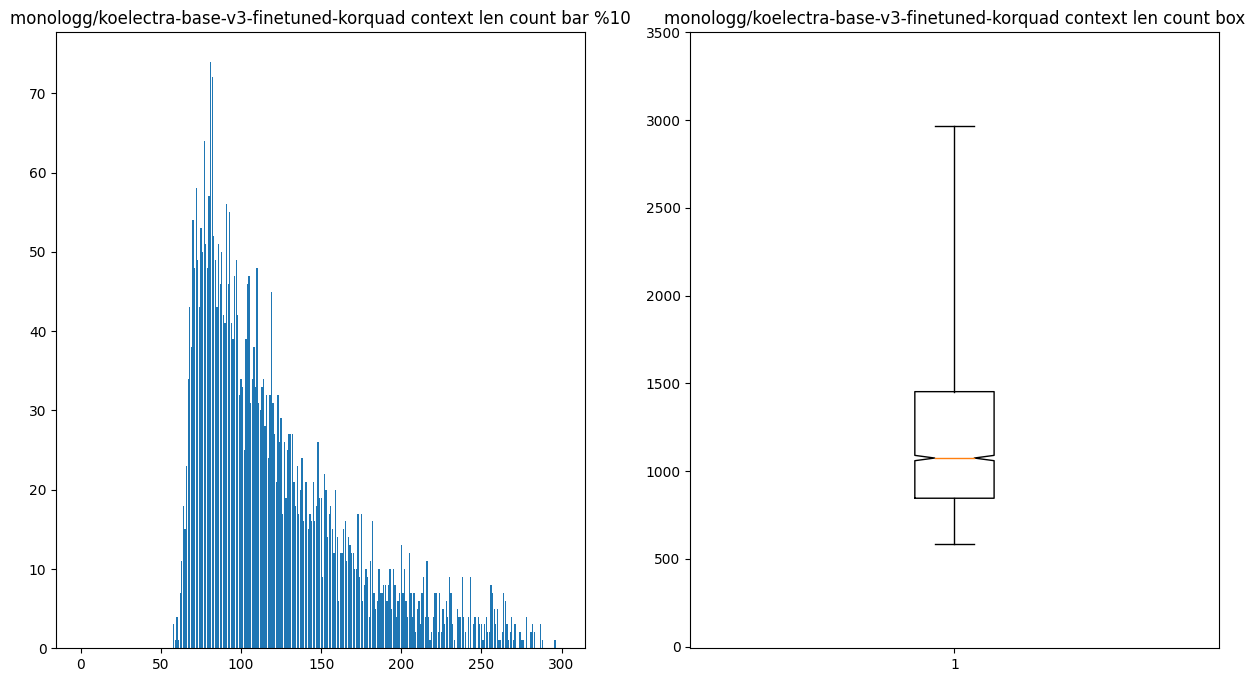

In [271]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,300),tokenizer5_context_list)
ax1.set_title('monologg/koelectra-base-v3-finetuned-korquad context len count bar %10')
ax2.boxplot([tokenizer5_context_len],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 3500.0)
ax2.set_xticks([1])
ax2.set_title('monologg/koelectra-base-v3-finetuned-korquad context len count box')
plt.show()